In [3]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
data = pd.read_csv('C:\PycharmProjects\Curso_Python_Zero_DS\datasets\kc_house_data.csv')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [15]:
# Quantos imóveis existem por número de quartos

print(data[data['bedrooms']==0].shape)
print(data[data['bedrooms']==1].shape)
print(data[data['bedrooms']==2].shape)
print(data[data['bedrooms']==3].shape)
print(data[data['bedrooms']==4].shape)

(13, 21)
(199, 21)
(2760, 21)
(9824, 21)
(6882, 21)


In [7]:
df_grouped = data[['id', 'bedrooms']].groupby('bedrooms')

In [22]:
for bedrooms, frame in df_grouped:
    print('numero de quartos: {}'.format(bedrooms))
    print(frame.shape, end='\n\n')

numero de quartos: 0
(13, 2)

numero de quartos: 1
(199, 2)

numero de quartos: 2
(2760, 2)

numero de quartos: 3
(9824, 2)

numero de quartos: 4
(6882, 2)

numero de quartos: 5
(1601, 2)

numero de quartos: 6
(272, 2)

numero de quartos: 7
(38, 2)

numero de quartos: 8
(13, 2)

numero de quartos: 9
(6, 2)

numero de quartos: 10
(3, 2)

numero de quartos: 11
(1, 2)

numero de quartos: 33
(1, 2)



# Respondendo as perguntas do CEO

In [ ]:
# 1. Qual o número de imóveis por ano de construção?

In [26]:
df_year_build = data[['id','yr_built']].groupby('yr_built').count()
print(df_year_build)

           id
yr_built     
1900       87
1901       29
1902       27
1903       46
1904       45
1905       74
1906       92
1907       65
1908       86
1909       94
1910      134
1911       73
1912       79
1913       59
1914       54
1915       64
1916       79
1917       56
1918      120
1919       88
1920       98
1921       76
1922       95
1923       84
1924      139
1925      165
1926      180
1927      115
1928      126
1929      114
...       ...
1986      215
1987      294
1988      270
1989      290
1990      320
1991      224
1992      198
1993      202
1994      249
1995      169
1996      195
1997      177
1998      239
1999      265
2000      218
2001      305
2002      222
2003      422
2004      433
2005      450
2006      454
2007      417
2008      367
2009      230
2010      143
2011      130
2012      170
2013      201
2014      559
2015       38

[116 rows x 1 columns]


In [29]:
# 2. Qual o menor número de quartos por ano de construção?

data[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
1905,1
1906,1
1907,1
1908,1


In [30]:
# 3. Qual o preço de compra mais alto por cada número de quartos?

data[['price','bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [33]:
# 4. Qual a soma de todos os preços de compra por número de quartos?

data[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


In [36]:
# 5. Qual a soma de todos os preços de compra por número de quartos e banheiros?

data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms','bathrooms']).sum()

price
bedrooms bathrooms             
0        0.00        3642600.00
         0.75         265000.00
         1.00         228000.00
         1.50         288000.00
         2.50         899950.00
1        0.00         839000.00
         0.50         255000.00
         0.75        6778450.00
         1.00       43694934.00
         1.25        1763500.00
         1.50        3908950.00
         1.75        1464200.00
         2.00        1783000.00
         2.25        1744900.00
         2.50         979000.00
2        0.50         382000.00
         0.75        8515351.00
         1.00      542297424.00
         1.25        1406950.00
         1.50      120575703.00
         1.75      143259595.00
         2.00       96844945.00
         2.25       61083264.00
         2.50      106556678.00
         2.75       11018842.00
         3.00        8379650.00
         3.25        6933200.00
         3.50         535000.00
3        0.75        4984201.00
         1.00      598408675.00
...                         ...
7        3.00        3655000.00
         3.25         419000.00
         3.50        5010000.00
         3.75        1663160.00
         4.00        3449957.00
         4.25        3274000.00
         4.50        4605000.00
         4.75        3184900.00
         5.50        1240000.00
         5.75         540000.00
         6.75         800000.00
         8.00        2280000.00
8        2.50         700000.00
         2.75        2670000.00
         3.00         948000.00
         3.25         430000.00
         3.50        1970000.00
         3.75         808000.00
         4.00        4200000.00
         5.00         490000.00
         6.00        2150000.00
9        3.00        1634000.00
         4.00        1400000.00
         4.50        1879999.00
         7.50         450000.00
10       2.00         650000.00
         3.00         660000.00
         5.25        1148000.00
11       3.00         520000.00
33       1.75         640000.00

[144 rows x 1 columns]

In [37]:
# 6. Qual o tamanho médio das salas dos imóveis por ano de consrução?

data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
1905,1965.81
1906,1802.23
1907,1904.28
1908,1699.64


In [38]:
# 7. Qual o tamanho mediano das salas dos imóveis por ano de consrução?

data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.00
1901,1610.00
1902,1600.00
1903,1505.00
1904,1280.00
1905,1865.00
1906,1600.00
1907,1700.00
1908,1575.00


In [40]:
# 8. Qual o desvio padrão das salas dos imóveis por ano de consrução?

data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.94
1901,668.23
1902,878.66
1903,469.72
1904,1076.87
1905,890.84
1906,961.13
1907,946.17
1908,696.23


In [ ]:
# 9. Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?

<BarContainer object of 2 artists>

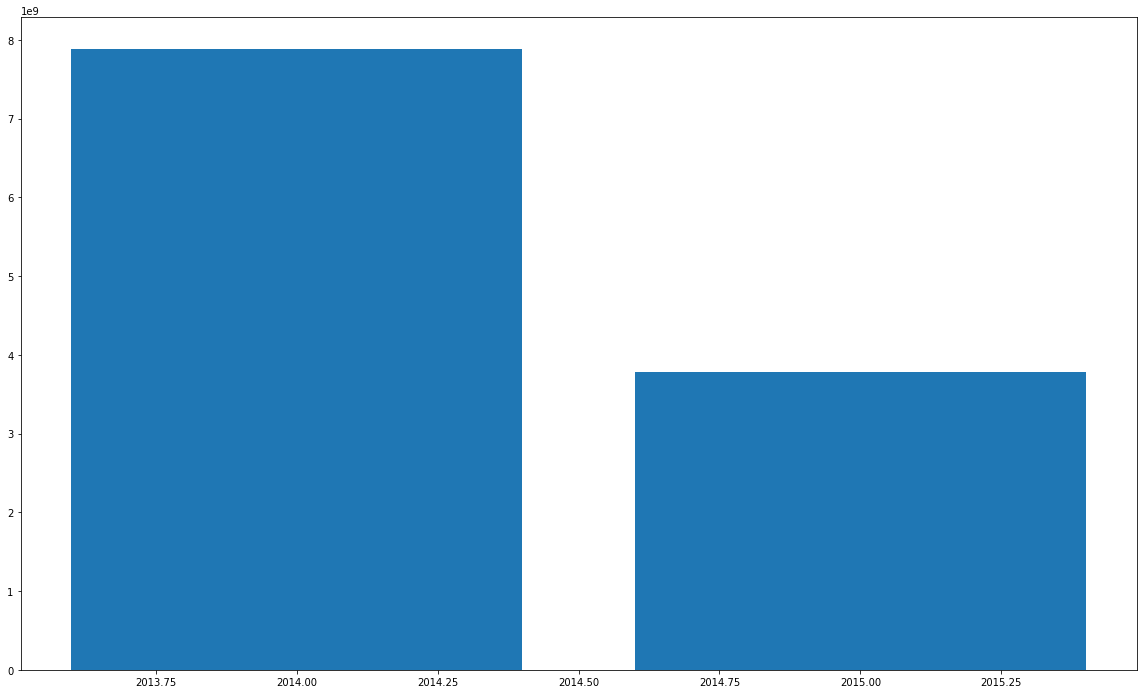

In [57]:
# Crescimento total de preços de compras dos imóveis por ano.
# Eixo X: ano
# Eixo Y: Soma dos preços
# Gráfico de Barras

from matplotlib import pyplot as plt

# First Graph
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price', 'year']].groupby('year').sum().reset_index()

plt.figure(figsize=(20,12))
plt.bar(by_year['year'], by_year['price'])

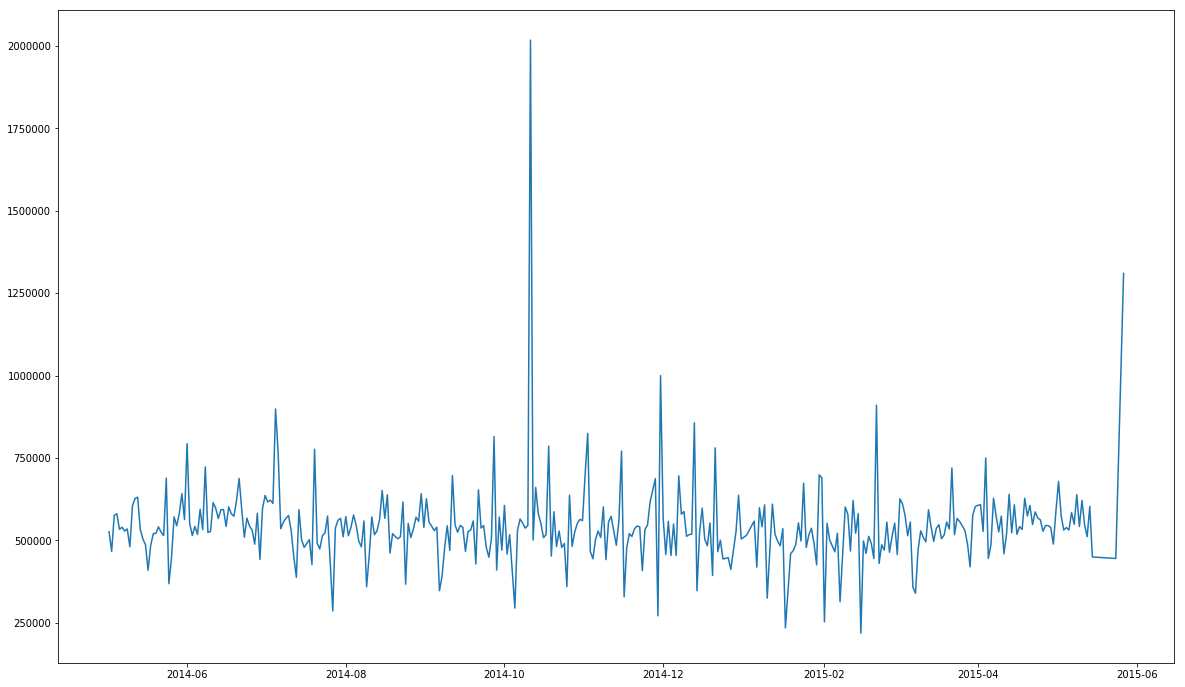

In [61]:
# Second Graph
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_day['day'], by_day['price'])

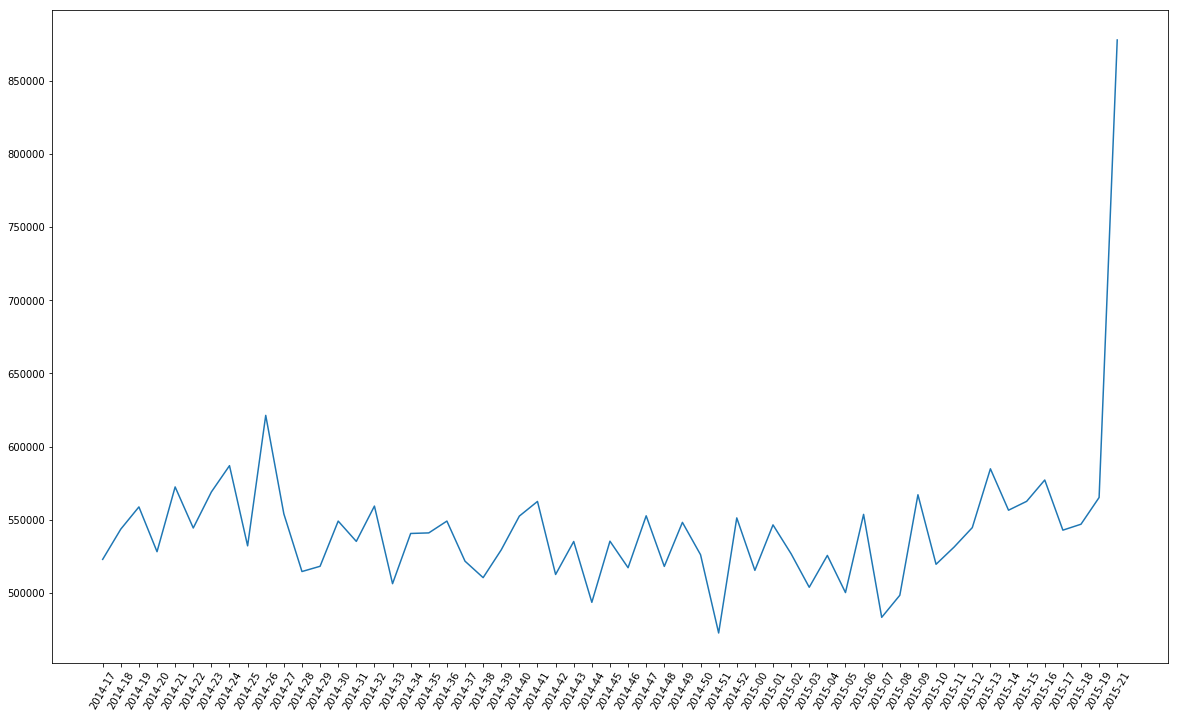

In [64]:
# Third Graph
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_week_year = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_week_year['year_week'], by_week_year['price'])
plt.xticks(rotation=60);

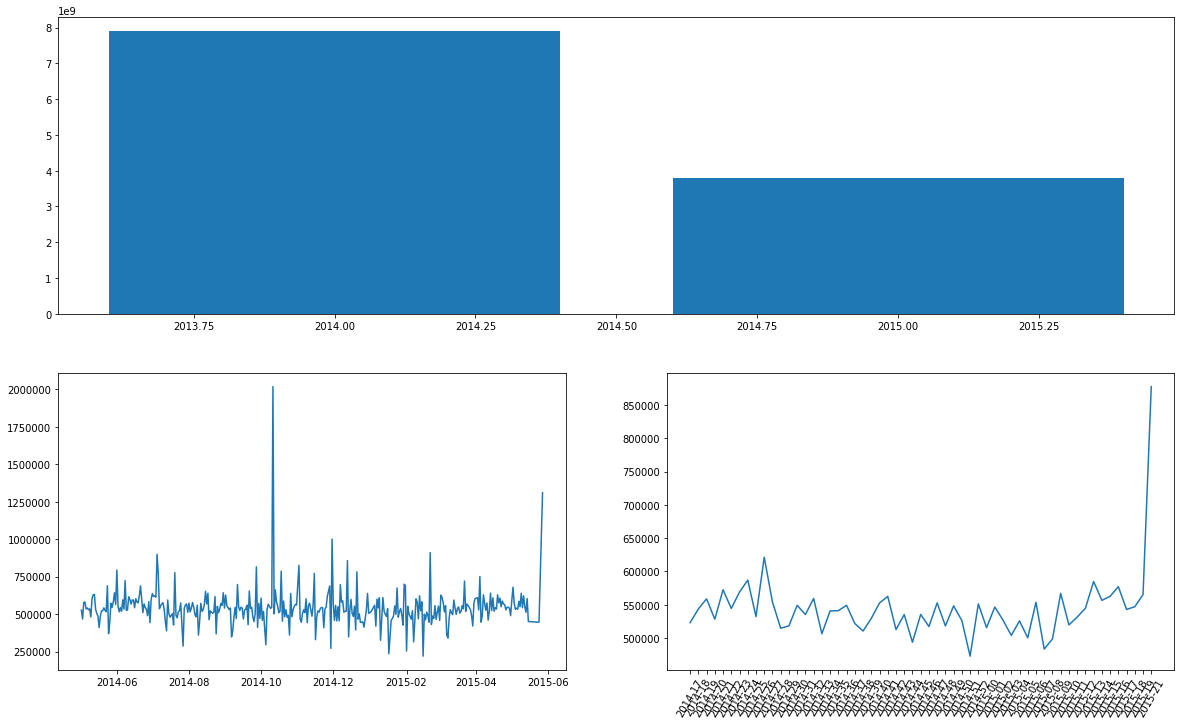

In [68]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20,12)) # Configura o tamanho da figura na tela do dashboard
specs = gridspec.GridSpec(ncols=2, nrows=2,figure=fig) # Define como o dashboard será divido na tela

ax1 = fig.add_subplot(specs[0, :])  # First Row
ax2 = fig.add_subplot(specs[1, 0])  # Second Rows - First Column
ax3 = fig.add_subplot(specs[1, 1])  # Second Rows - Second Column


# First Graph
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price', 'year']].groupby('year').sum().reset_index()


ax1.bar(by_year['year'], by_year['price'])

# Second Graph
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()


ax2.plot(by_day['day'], by_day['price'])

# Third Graph
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_week_year = data[['price', 'year_week']].groupby('year_week').mean().reset_index()


ax3.plot(by_week_year['year_week'], by_week_year['price'])
plt.xticks(rotation=60); # rotaciona a legenda

In [75]:
# 10. Identificar as casas no mapa com maior preço

import plotly.express as px

houses = data[['id', 'lat','long','price']]

fig = px.scatter_mapbox(houses,
                        lat = 'lat',
                        lon = 'long',
                        size = 'price',
                        color_continuous_scale = px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10)

fig.update_layout(mapbox_style = 'open-steet-map')
fig.update_layout(height=600, margin={'r':0,'t':0,'l':0,'b':0,})
fig.show()

In [6]:
data['dormitory_type'] = 'type'

data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'

print(data[data['dormitory_type'] == 'house'].sort_values('bedrooms', ascending=False))

               id             date      price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.00        33       1.75   
8757   1773100755  20140821T000000  520000.00        11       3.00   
13314   627300145  20140814T000000 1148000.00        10       5.25   
19254  8812401450  20141229T000000  660000.00        10       3.00   
15161  5566100170  20141029T000000  650000.00        10       2.00   
16844  8823900290  20150317T000000 1400000.00         9       4.00   
6079   9822700190  20140808T000000 1280000.00         9       4.50   
4235   2902200015  20150106T000000  700000.00         9       3.00   
8546    424049043  20140811T000000  450000.00         9       7.50   
4096   1997200215  20140507T000000  599999.00         9       4.50   
18443  8823901445  20150313T000000  934000.00         9       3.00   
9452   2769600590  20141016T000000  900000.00         8       4.00   
19302  3756900027  20141125T000000  575000.00         8       3.00   
4035    685000115  2